In [1]:
import pandas as pd

In [2]:
# Read file data to dataframe, explicitly setting S/N columns to string type because Pandas complains 
# about mixed types in the Paired Processor S/N column
data = pd.read_csv('Exercise_Input_20220502_Processor.csv',
                       dtype = {'Processor S/N': str, 'Paired Processor S/N': str},
                       parse_dates = ['Cloud Uploaded Timestamp From Site'])

In [3]:
# project out the columns needed
data = data[['Processor S/N', 'Cloud Uploaded Timestamp From Site', 'Battery Life Estimate (hours)']]

In [4]:
# sort by uploaded time (descending), group by S/N, pick the first one in each group
analysis2_part1 = data \
                  .drop(data[data['Battery Life Estimate (hours)'] == 0].index) \
                  .sort_values('Cloud Uploaded Timestamp From Site', ascending=False) \
                  .groupby('Processor S/N').head(1)

<AxesSubplot:title={'center':'Battery Life Distribution'}, ylabel='Frequency'>

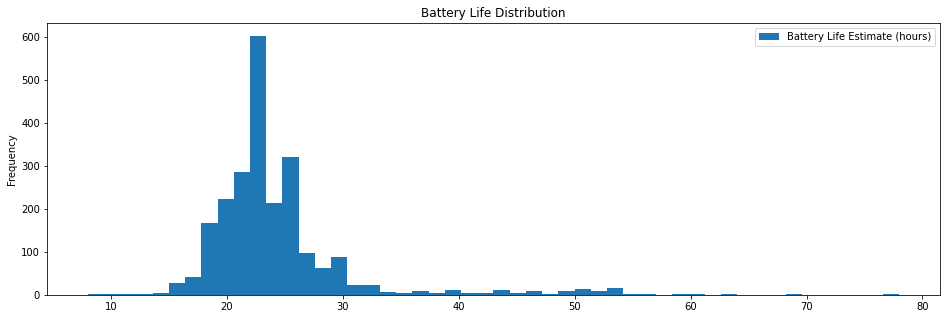

In [5]:
# Visualization
analysis2_part1.plot.hist(column=['Battery Life Estimate (hours)'], bins = 50, figsize=(16,5), title='Battery Life Distribution')

In [6]:
# sort by uploaded time (descending), group by S/N, pick the first three per group, take the average battery life
analysis2_part2 = data \
                  .drop(data[data['Battery Life Estimate (hours)'] == 0].index) \
                  .sort_values('Cloud Uploaded Timestamp From Site', ascending=False) \
                  .groupby('Processor S/N').filter(lambda x : len(x) >= 5) \
                  .groupby('Processor S/N').head(3) \
                  .groupby('Processor S/N').mean()

<AxesSubplot:title={'center':'Battery Life Distribution'}, ylabel='Frequency'>

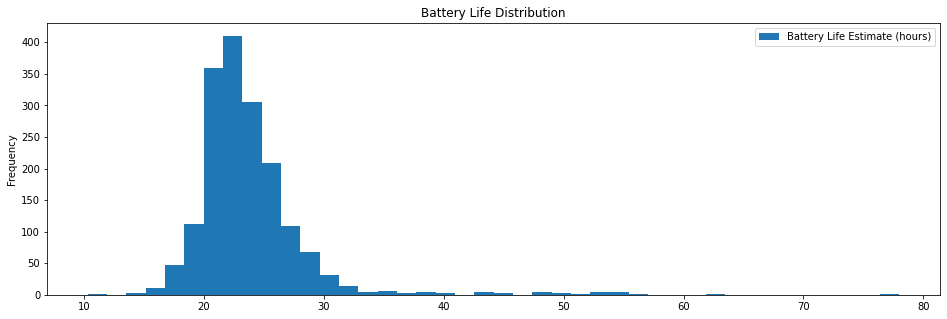

In [8]:
# Visualization
analysis2_part2.plot.hist(column=['Battery Life Estimate (hours)'], bins = 42, figsize = (16,5), title='Battery Life Distribution')